In [1]:
import numpy as np
from matplotlib import pyplot as plt
import plotly.figure_factory as ff
from tqdm.notebook import tqdm, trange

from PageRankSolver.pretty_print import *
import PageRankSolver.fast.solver as fast_solver
import PageRankSolver.fast.tmatrix as fast_tmatrix
import PageRankSolver.slow.solver as solver
import PageRankSolver.slow.tmatrix as tmatrix

from numba import njit
%load_ext autoreload
%autoreload 2

In [151]:
A = fast_tmatrix.generate(10, 0.99)
fast_tmatrix.check_matrix(A)

array([0., 0., 0., 0., 1.])

In [10]:
Prs = np.linspace(0.01, 0.9, 20)
sizes = np.linspace(5,50, 20).astype(np.int32)

repeats = 5000

def problem_experiment(Prs, sizes, repeats):

    results = np.zeros((5, len(sizes), len(Prs)))

    for pr_idx in trange(len(Prs)):
        for size_idx in range(len(sizes)):
            for _ in range(repeats):
                A = fast_tmatrix.generate(sizes[size_idx] ,Pr = Prs[pr_idx])
                problem_vec = fast_tmatrix.check_matrix(A)
                results[:,size_idx, pr_idx] +=  problem_vec

    return results


In [2]:
np.linspace(1,50, 20).astype(np.int32)

array([ 1,  3,  6,  8, 11, 13, 16, 19, 21, 24, 26, 29, 31, 34, 37, 39, 42,
       44, 47, 50], dtype=int32)

In [91]:
n_s =  np.linspace(5,50, 20).astype(np.int32)
m_s  = np.linspace(1,50, 20).astype(np.int32)

repeats = 5000

def problem_experiment(m_s, n_s, repeats):

    results = np.zeros((5, len(n_s), len(m_s)))

    for m in trange(len(m_s)):
        for n in range(len(n_s)):
            for _ in range(repeats):
                A = fast_tmatrix.generate_bollobas_riordan(n_s[n] ,m_s[m])
                A = fast_tmatrix.add_weak_links(A)
                problem_vec = fast_tmatrix.check_matrix(A)
                results[:,n, m] +=  problem_vec

    return results


In [96]:
res = problem_experiment(m_s, n_s, repeats)

In [12]:
res = problem_experiment(Prs, sizes, repeats)

In [129]:
res[:,0,19]

array([ 470.,    0., 5000.,    0.,    0.])

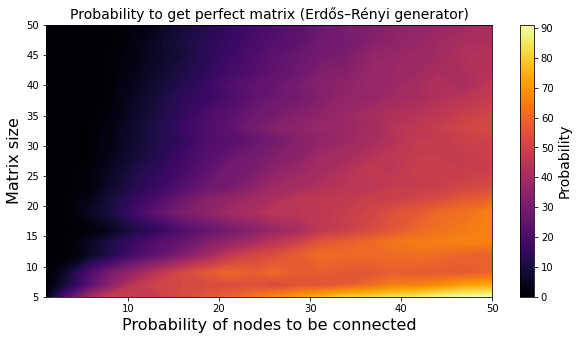

In [20]:
prob = 4

xx, yy = np.meshgrid(m_s, n_s)
zz = np.empty_like(xx)

for i,h in enumerate(m_s):
    for j,snr in enumerate(n_s):
        zz[j,i] = res[prob,j,i]/5000*100


plt.figure(figsize = (10,5))
plt.contourf(xx,yy,zz, levels= 100, cmap ='inferno')
plt.xlabel("Probability of nodes to be connected", fontsize = 16)
plt.ylabel("Matrix size", fontsize = 16)
plt.title("Probability to get perfect matrix (Erdős–Rényi generator)", fontsize = 14)
cbar = plt.colorbar();
cbar.set_label('Probability', fontsize = 14)


In [3]:
res = f['res']
n_s = f['n_s']
m_s = f['m_s']

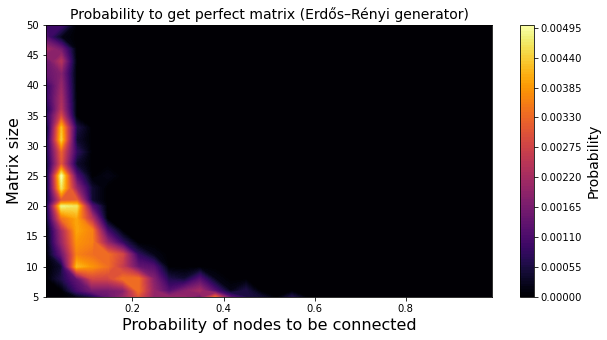

In [159]:
prob = 1

xx, yy = np.meshgrid(Prs, sizes)
zz = np.empty_like(xx)

for i,h in enumerate(Prs):
    for j,snr in enumerate(sizes):
        zz[j,i] = res[prob,j,i]/5000


plt.figure(figsize = (10,5))
plt.contourf(xx,yy,zz, levels= 100, cmap ='inferno')
plt.xlabel("Probability of nodes to be connected", fontsize = 16)
plt.ylabel("Matrix size", fontsize = 16)
plt.title("Probability to get perfect matrix (Erdős–Rényi generator)", fontsize = 14)
cbar = plt.colorbar();
cbar.set_label('Probability', fontsize = 14)


In [23]:
np.savez('23_10', Prs = Prs, sizes = sizes, res= res)

In [137]:
res[:,5,6]

array([  12,    0,    0,    0, 4988])

In [193]:
Prs = [0,1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
sizes = [5, 10, 15, 20, 30 ,50]

prob = 0
xx, yy = np.meshgrid(Prs, sizes)
zz = np.empty_like(xx)

for i,h in enumerate(Prs):
    for j,snr in enumerate(sizes):
        zz[j,i] = res[prob,j,i]/5000

In [140]:
from matplotlib import pyplot as plt

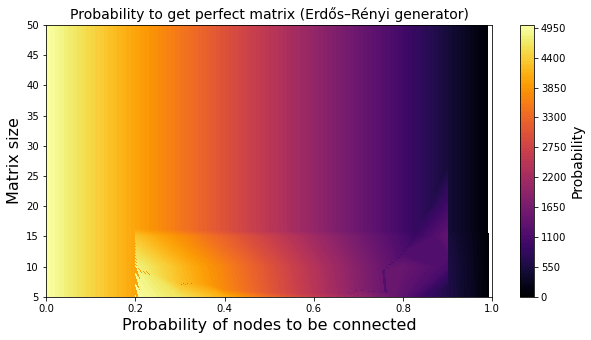

In [194]:
plt.figure(figsize = (10,5))
plt.contourf(xx,yy,zz, levels= 100, cmap ='inferno')
plt.xlabel("Probability of nodes to be connected", fontsize = 16)
plt.ylabel("Matrix size", fontsize = 16)
plt.title("Probability to get perfect matrix (Erdős–Rényi generator)", fontsize = 14)
cbar = plt.colorbar();
cbar.set_label('Probability', fontsize = 14)


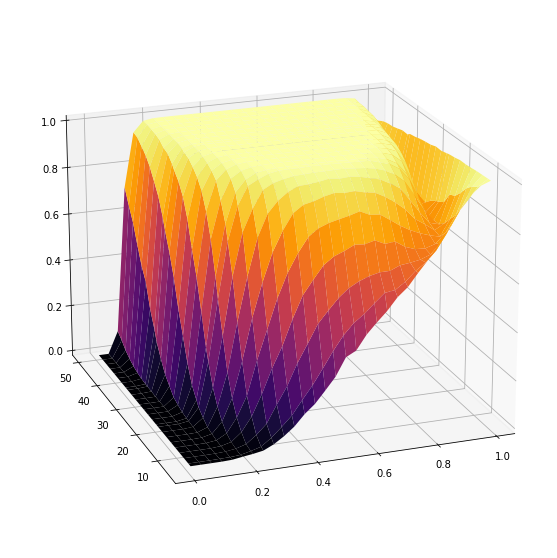

In [146]:

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize =(10,10) )
ax = fig.add_subplot(111, projection='3d',)
ax.view_init(20,-110)
surf = ax.plot_surface(xx, yy, zz, rstride=1, cstride=1, cmap=plt.cm.inferno, linewidth=0, antialiased=True)

In [ ]:
@njit(fastmath = True)
def eig(A):
    
    eig_vals, eig_vecs = np.linalg.eig(A.astype(np.complex128))
    eig_vecs = eig_vecs.T

    n_solutions = 0

    for lambd in eig_vals:
        if abs(lambd-1) < 1e-12:
            n_solutions +=1

    ans = np.array(A.shape[0], n_solutions)
    idx = 0

    for l_idx in range(len(eig_vals)):
        if abs(eig_vals[l_idx]-1) < 1e-12:
            ans[:,idx] = eig_vecs[l_idx,:]
    
    return ans


In [40]:
A = fast_tmatrix.generate(Pr = 0.85, size = 10)
eig_vals, eig_vecs = np.linalg.eig(A.astype(np.complex128))
eig_vecs = eig_vecs.T


In [51]:
matprint(eig_vecs)

 0.35-0.00j   0.27+0.00j   0.31-0.00j   0.31-0.00j   0.32-0.00j   0.35+0.00j   0.32-0.00j   0.30+0.00j   0.27+0.00j   0.34+0.00j  
 0.08+0.17j  -0.06-0.25j  -0.36-0.13j  -0.36-0.13j   0.42+0.00j   0.10+0.16j   0.42+0.00j  -0.21+0.26j  -0.06-0.25j   0.04+0.19j  
-0.15+0.09j  -0.31-0.26j   0.07+0.19j   0.07+0.19j   0.49+0.00j  -0.15+0.12j   0.49+0.00j  -0.06-0.13j  -0.31-0.26j  -0.14+0.06j  
 0.08-0.17j  -0.06+0.25j  -0.36+0.13j  -0.36+0.13j   0.42-0.00j   0.10-0.16j   0.42+0.00j  -0.21-0.26j  -0.06+0.25j   0.04-0.19j  
-0.15-0.09j  -0.31+0.26j   0.07-0.19j   0.07-0.19j   0.49-0.00j  -0.15-0.12j   0.49+0.00j  -0.06+0.13j  -0.31+0.26j  -0.14-0.06j  
 0.00+0.00j  -0.07-0.00j   0.55+0.00j   0.55+0.00j  -0.27+0.00j   0.00+0.00j  -0.27+0.00j   0.07+0.00j  -0.07-0.00j  -0.49+0.00j  
 0.00+0.00j  -0.00-0.00j   0.00-0.00j   0.00-0.00j  -0.41+0.00j   0.82+0.00j  -0.41+0.00j  -0.00-0.00j  -0.00-0.00j  -0.00+0.00j  
-0.00-0.00j   0.00-0.00j  -0.00+0.00j  -0.00-0.00j   0.72+0.00j  -0.02-0.01j  -0.70

In [56]:
matprint(eig_vecs[0,:].reshape(1,-1))

0.35-0.00j  0.27+0.00j  0.31-0.00j  0.31-0.00j  0.32-0.00j  0.35+0.00j  0.32-0.00j  0.30+0.00j  0.27+0.00j  0.34+0.00j  


In [ ]:
A = fast_tmatrix.generate(Pr = 85, size = 30)
A = fast_tmatrix.add_weak_links(A)
true_vec = fast_solver.eig
loss_history = fast_solver.mcmc_loss(A=A, n_trials= 2000, true_vec=)

In [22]:
from sklearn.metrics import mean_squared_error as mse

In [31]:
a = np.random.rand(20)*100000
b= np.random.rand(20)*1000000 

In [32]:
mse(a,b)

334919434489.6086

In [33]:
def MSE(a,b):
    return np.mean(((a - b)**2))
